# Import dataset

In [1]:
from sklearn.preprocessing import LabelEncoder

In [2]:
import pandas as pd
df = pd.read_csv('churn_dataset.csv')
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

## String to numeric value

In [4]:
df = df.replace({True: 1, False: 0})
df = df.replace({'Yes': 1, 'No': 0})
# Convert state abbreviations to numerical values
le = LabelEncoder()
df['State'] = le.fit_transform(df['State'])

C:\Users\Michael\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Michael\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [5]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,49,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,39,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,6,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


## Normalisasi

**Normalisasi data dengan Z-score**
$$ X(stand) = \frac{x - mean (x)}{std_\text{dev}} $$
dimana $${mean = 0}, {std_\text{dev}} = 1 $$

In [6]:
def normalize(data, i):
    # Initialize a list to store the means of each column
    means = [0] * i
    # Initialize a list to store the standard deviations of each column
    stds = [1] * i
    # Loop through the columns
    for j in range(i):
        # Compute the mean of the column
        mean = data.iloc[:, j].mean()
        # Compute the standard deviation of the column
        std = data.iloc[:, j].std()
        # Store the mean and standard deviation
        means[j] = mean
        stds[j] = std
    # Loop through the rows
    for index in data.index:
        # Loop through the columns
        for j in range(i):
            # Normalize the value by subtracting the mean and dividing by the standard deviation
            data.loc[index, data.columns[j]] = (data.loc[index, data.columns[j]] - means[j]) / stds[j]
    # Return the normalized data
    return data


In [7]:
# Get data needs to be normalized
features_to_norm = ['Total day minutes','Total day calls','Total day charge','Total eve minutes','Total eve calls','Total eve charge','Total night minutes','Total night calls','Total night charge','Total intl minutes','Total intl calls','Total intl charge','Customer service calls']
normalized = df [features_to_norm]
i = normalized.shape[1]
normalized = normalize(normalized,i)
print(normalized)
# Put it back to df
df = df.drop(features_to_norm, axis=1)
df = pd.concat([df, normalized], axis=1)

C:\Users\Michael\AppData\Local\Temp\ipykernel_1172\1167225100.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.4765716430729889' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[index, data.columns[j]] = (data.loc[index, data.columns[j]] - means[j]) / stds[j]
C:\Users\Michael\AppData\Local\Temp\ipykernel_1172\1167225100.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-0.05593195749567613' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[index, data.columns[j]] = (data.loc[index, data.columns[j]] - means[j]) / stds[j]
C:\Users\Michael\AppData\Local\Temp\ipykernel_1172\1167225100.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-0.4654245281314051' has dtype incomp

      Total day minutes  Total day calls  Total day charge  Total eve minutes  \
0              1.566532         0.476572          1.566801          -0.070599   
1             -0.333688         1.124334         -0.333963          -0.108064   
2              1.168128         0.675883          1.168289          -1.573147   
3              2.196267        -1.466716          2.196429          -2.742453   
4             -0.240054         0.626055         -0.240005          -1.038776   
...                 ...              ...               ...                ...   
3328          -0.432830        -1.167749         -0.433321           0.286305   
3329           0.942305        -2.164306          0.942573          -0.938212   
3330           0.018817         0.426744          0.019190           1.731670   
3331           0.624684         0.227432          0.625059          -0.815958   
3332           1.002892         0.626055          1.003052           1.280117   

      Total eve calls  Tota

In [8]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Churn,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,16,128,415,0,1,25,0,1.566532,0.476572,1.566801,-0.070599,-0.055932,-0.070416,0.866613,-0.465425,0.865899,-0.084995,-0.601105,-0.085678,-0.427868
1,35,107,415,0,1,26,0,-0.333688,1.124334,-0.333963,-0.108064,0.144845,-0.107533,1.058412,0.147802,1.059231,1.240296,-0.601105,1.240982,-0.427868
2,31,137,415,0,0,0,0,1.168128,0.675883,1.168289,-1.573147,0.496204,-1.573664,-0.756756,0.198905,-0.755457,0.703015,0.211502,0.697052,-1.188040
3,35,84,408,1,0,0,0,2.196267,-1.466716,2.196429,-2.742453,-0.608068,-2.742856,-0.078539,-0.567629,-0.078794,-1.302831,1.024109,-1.306205,0.332305
4,36,75,415,1,0,0,0,-0.240054,0.626055,-0.240005,-1.038776,1.098534,-1.037784,-0.276270,1.067643,-0.276520,-0.049177,-0.601105,-0.045878,1.092477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,415,0,1,36,0,-0.432830,-1.167749,-0.433321,0.286305,1.299311,0.286837,1.546807,-0.874243,1.546956,-0.120814,0.617806,-0.125477,0.332305
3329,49,68,415,0,0,0,0,0.942305,-2.164306,0.942573,-0.938212,-2.264476,-0.938031,-0.189269,1.169848,-0.188642,-0.228270,-0.194801,-0.231610,1.092477
3330,39,28,510,0,0,0,0,0.018817,0.426744,0.019190,1.731670,-2.113894,1.732089,-0.177405,-0.465425,-0.175460,1.383570,0.617806,1.386915,0.332305
3331,6,184,510,1,0,0,0,0.624684,0.227432,0.625059,-0.815958,-0.808845,-0.815080,-1.219445,1.885279,-1.221213,-1.875929,2.243020,-1.876669,0.332305


Setelah data dinormalisasi, selanjutnya ialah PCA

- menghitung covariance matrix
$$
        Cov (\sum) = \begin{pmatrix}
        cov (x_1,x_1) & cov(x_1,x_2) & ... & cov(x_1,x_m) \\
        | & | & | & | \\
        cov (x_m,x_1) & cov(x_m,x_2) & ... & cov(x_m,x_m)
        \end{pmatrix}
$$
  di mana \(X\) adalah matriks data yang memiliki dimensi \(n x m\), dengan \(n\) adalah jumlah sampel dan \(m\) adalah jumlah fitur.
- menghitung eigenvalue dan eigenvector
$$ AX = λX $$

In [9]:
# Import numpy and pandas libraries
import numpy as np
import pandas as pd

# Define a function to do a PCA
def do_pca(data, n_components):
  # data: a numpy array of shape (n_samples, n_features)
  # n_components: an integer specifying the number of principal components to keep
  # returns: a numpy array of shape (n_samples, n_components) containing the projected data

  # Calculate the covariance matrix of the data
  cov_matrix = np.cov(data.T)

  # Calculate the eigenvalues and eigenvectors of the covariance matrix
  eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

  # Sort the eigenvalues and eigenvectors in descending order
  idx = np.argsort(eigenvalues)[::-1]
  eigenvalues = eigenvalues[idx]
  eigenvectors = eigenvectors[:, idx]

  # Select the first n_components eigenvectors as the principal components
  pc = eigenvectors[:, :n_components]

  # Project the data onto the principal components
  transformed_data = np.dot(data, pc)

  # Return the transformed data
  return transformed_data


# DNN

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Split the data into features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Dense(32, input_dim=len(X.columns), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
84/84 [==============================] - 1s 2ms/step - loss: 0.9723 - accuracy: 0.7626 - val_loss: 0.5229 - val_accuracy: 0.8081
Epoch 2/100
84/84 [==============================] - 0s 1ms/step - loss: 0.4664 - accuracy: 0.8432 - val_loss: 0.4467 - val_accuracy: 0.8501
Epoch 3/100
84/84 [==============================] - 0s 999us/step - loss: 0.4197 - accuracy: 0.8563 - val_loss: 0.4163 - val_accuracy: 0.8486
Epoch 4/100
84/84 [==============================] - 0s 1ms/step - loss: 0.4045 - accuracy: 0.8567 - val_loss: 0.4016 - val_accuracy: 0.8486
Epoch 5/100
84/84 [==============================] - 0s 967us/step - loss: 0.4032 - accuracy: 0.8567 - val_loss: 0.3929 - val_accuracy: 0.8486
Epoch 6/100
84/84 [==============================] - 0s 1ms/step - loss: 0.3958 - accuracy: 0.8571 - val_loss: 0.3903 - val_accuracy: 0.8486
Epoch 7/100
84/84 [==============================] - 0s 1ms/step - loss: 0.4029 - accuracy: 0.8578 - val_loss: 0.3866 - val_accuracy: 0.8486
Epoch 8/1

C:\Users\Michael\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Michael\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Michael\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` 

21/21 [==============================] - 0s 535us/step
F1 Score: 0.28125
ROC AUC Score: 0.8226043452401777
Training Accuracy: 0.8642160296440125
Training Loss: 0.33424532413482666
Validation Accuracy: 0.8620689511299133
Validation Loss: 0.3353058397769928


C:\Users\Michael\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Michael\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Michael\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` 

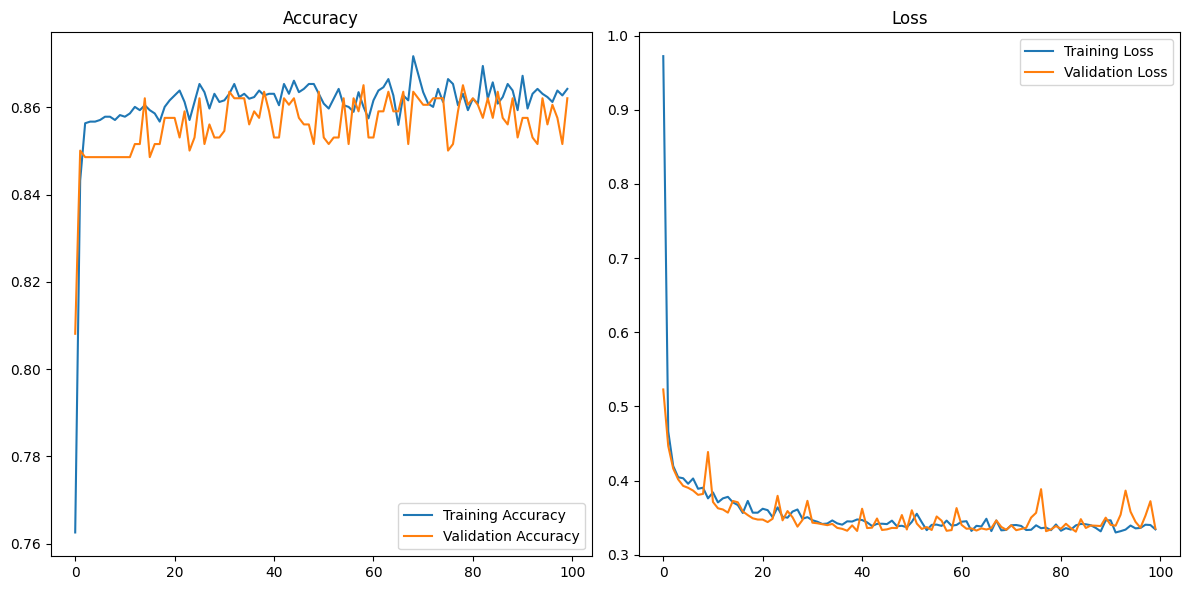

In [12]:
import matplotlib.pyplot as plt
# Predict the probabilities for the test data
y_pred_probs = model.predict(X_test)

# Convert probabilities into binary outputs
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_probs]

# Calculate F1 score and ROC AUC score
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_probs)

print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

# Print the accuracy and loss
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

print(f'Training Accuracy: {train_acc[-1]}')
print(f'Training Loss: {train_loss[-1]}')
print(f'Validation Accuracy: {val_acc[-1]}')
print(f'Validation Loss: {val_loss[-1]}')

# Plot the accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

# Plot the loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()
